#### Step 1: Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


#### Step 2: Load the dataset

In [2]:
df = pd.read_csv("Disease_Symptoms.csv")

#### Step 3: Exploratory Data Analysis and data Preprocessing

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.shape

(4920, 133)

In [5]:
df.size

654360

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

#### Step 4: Divide the datasets into input and output

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
df.shape

(4920, 133)

In [11]:
# Last column are consider as input
X.shape

(4920, 132)

In [12]:
# Only last column is target
y.shape

(4920,)

In [13]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [14]:
df['prognosis'].value_counts

<bound method IndexOpsMixin.value_counts of 0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object>

#### Step 5: Divide the datasets into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4920, 133)
(3444, 132)
(1476, 132)
(3444,)
(1476,)


#### Step 6:  Suppose vector machine

###### Build and train the models using SVM

In [17]:
svmodel1 = svm.SVC(kernel='linear')
svmodel2 = svm.SVC(kernel='poly')
svmodel3 = svm.SVC(kernel='rbf')

In [18]:
svmodel1.fit(X_train,y_train)
svmodel2.fit(X_train,y_train)
svmodel3.fit(X_train,y_train)

SVC()

##### Do the prediction of SVM models

In [19]:
y_pred1 = svmodel1.predict(X_test)
y_pred2 = svmodel2.predict(X_test)
y_pred3 = svmodel3.predict(X_test)

##### Evalute the SVM models

In [20]:
print("Model 1 accuracy: ",metrics.accuracy_score(y_pred1, y_test))
print("Model 2 accuracy: ",metrics.accuracy_score(y_pred2, y_test))
print("Model 3 accuracy: ",metrics.accuracy_score(y_pred3, y_test))

Model 1 accuracy:  1.0
Model 2 accuracy:  1.0
Model 3 accuracy:  1.0


#### Step 7: Naive Bayes

##### Build and train the model using Naive Bayes

In [21]:
nbmodel = GaussianNB()

In [22]:
nbmodel.fit(X_train, y_train)

GaussianNB()

In [23]:
nbmodel.score(X_test, y_test)

1.0

##### Do the prediction of Naive Bayes model

In [24]:
y_pred4 = nbmodel.predict(X_test)

##### Evalute the Naive bayes model

In [25]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred4))

Accuracy Score on test data:  1.0


#### Step 8: Logistic Regression

#####  Build and train the model using Logistic Regression

In [26]:
lrmodel = LogisticRegression()

In [27]:
lrmodel.fit(X_train, y_train)

LogisticRegression()

#####  Do the prediction of Logistic Regression model

In [28]:
y_pred5 = lrmodel.predict(X_test)

In [29]:
y_pred5

array(['GERD', 'Migraine', 'Varicose veins', ..., 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis'], dtype=object)

In [30]:
y_test

array(['GERD', 'Migraine', 'Varicose veins', ..., 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis'], dtype=object)

In [31]:
lrmodel.score(X_test,y_test)

1.0

In [32]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred5))

Accuracy Score on test data:  1.0


#### Step 9: K-Nearest Neighbor

##### Choosing best value for K

In [33]:
error_rate = []

for i in range(1,10):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    pred_i = knnmodel.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [43]:
error_rate
# here error rate is zero for all the k values, we can take any value for k

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

##### Build and train the model using K-nearest neighbor

In [45]:
knnmodel = KNeighborsClassifier(n_neighbors=3)

In [47]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##### Do the prediction of KNN model

In [49]:
y_pred = knnmodel.predict(X_test)

In [50]:
y_test

array(['GERD', 'Migraine', 'Varicose veins', ..., 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis'], dtype=object)

In [51]:
y_pred

array(['GERD', 'Migraine', 'Varicose veins', ..., 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis'], dtype=object)

##### Evalute the KNN model

In [54]:
print(confusion_matrix(y_test,y_pred))

[[29  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 39  0]
 [ 0  0  0 ...  0  0 43]]


In [56]:
print(classification_report(y_pred,y_test))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        29
                                   AIDS       1.00      1.00      1.00        37
                                   Acne       1.00      1.00      1.00        43
                    Alcoholic hepatitis       1.00      1.00      1.00        46
                                Allergy       1.00      1.00      1.00        34
                              Arthritis       1.00      1.00      1.00        34
                       Bronchial Asthma       1.00      1.00      1.00        30
                   Cervical spondylosis       1.00      1.00      1.00        44
                            Chicken pox       1.00      1.00      1.00        30
                    Chronic cholestasis       1.00      1.00      1.00        28
                            Common Cold       1.00      1.00      1.00        39
                           

#### Step 10: Decision tree

##### Build and train the model using Decision Tree

In [34]:
dtmodel = DecisionTreeClassifier()

In [35]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

##### Do the prediction of Decision tree model

In [36]:
y_pred6 = dtmodel.predict(X_test)

In [37]:
y_pred6

array(['GERD', 'Migraine', 'Varicose veins', ..., 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis'], dtype=object)

In [38]:
y_test

array(['GERD', 'Migraine', 'Varicose veins', ..., 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis'], dtype=object)

##### Evalute the decision tree model

In [39]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred6))

Accuracy Score on test data:  1.0


In [57]:
print(confusion_matrix(y_test,y_pred))

[[29  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 39  0]
 [ 0  0  0 ...  0  0 43]]


##### Plot the decision tree

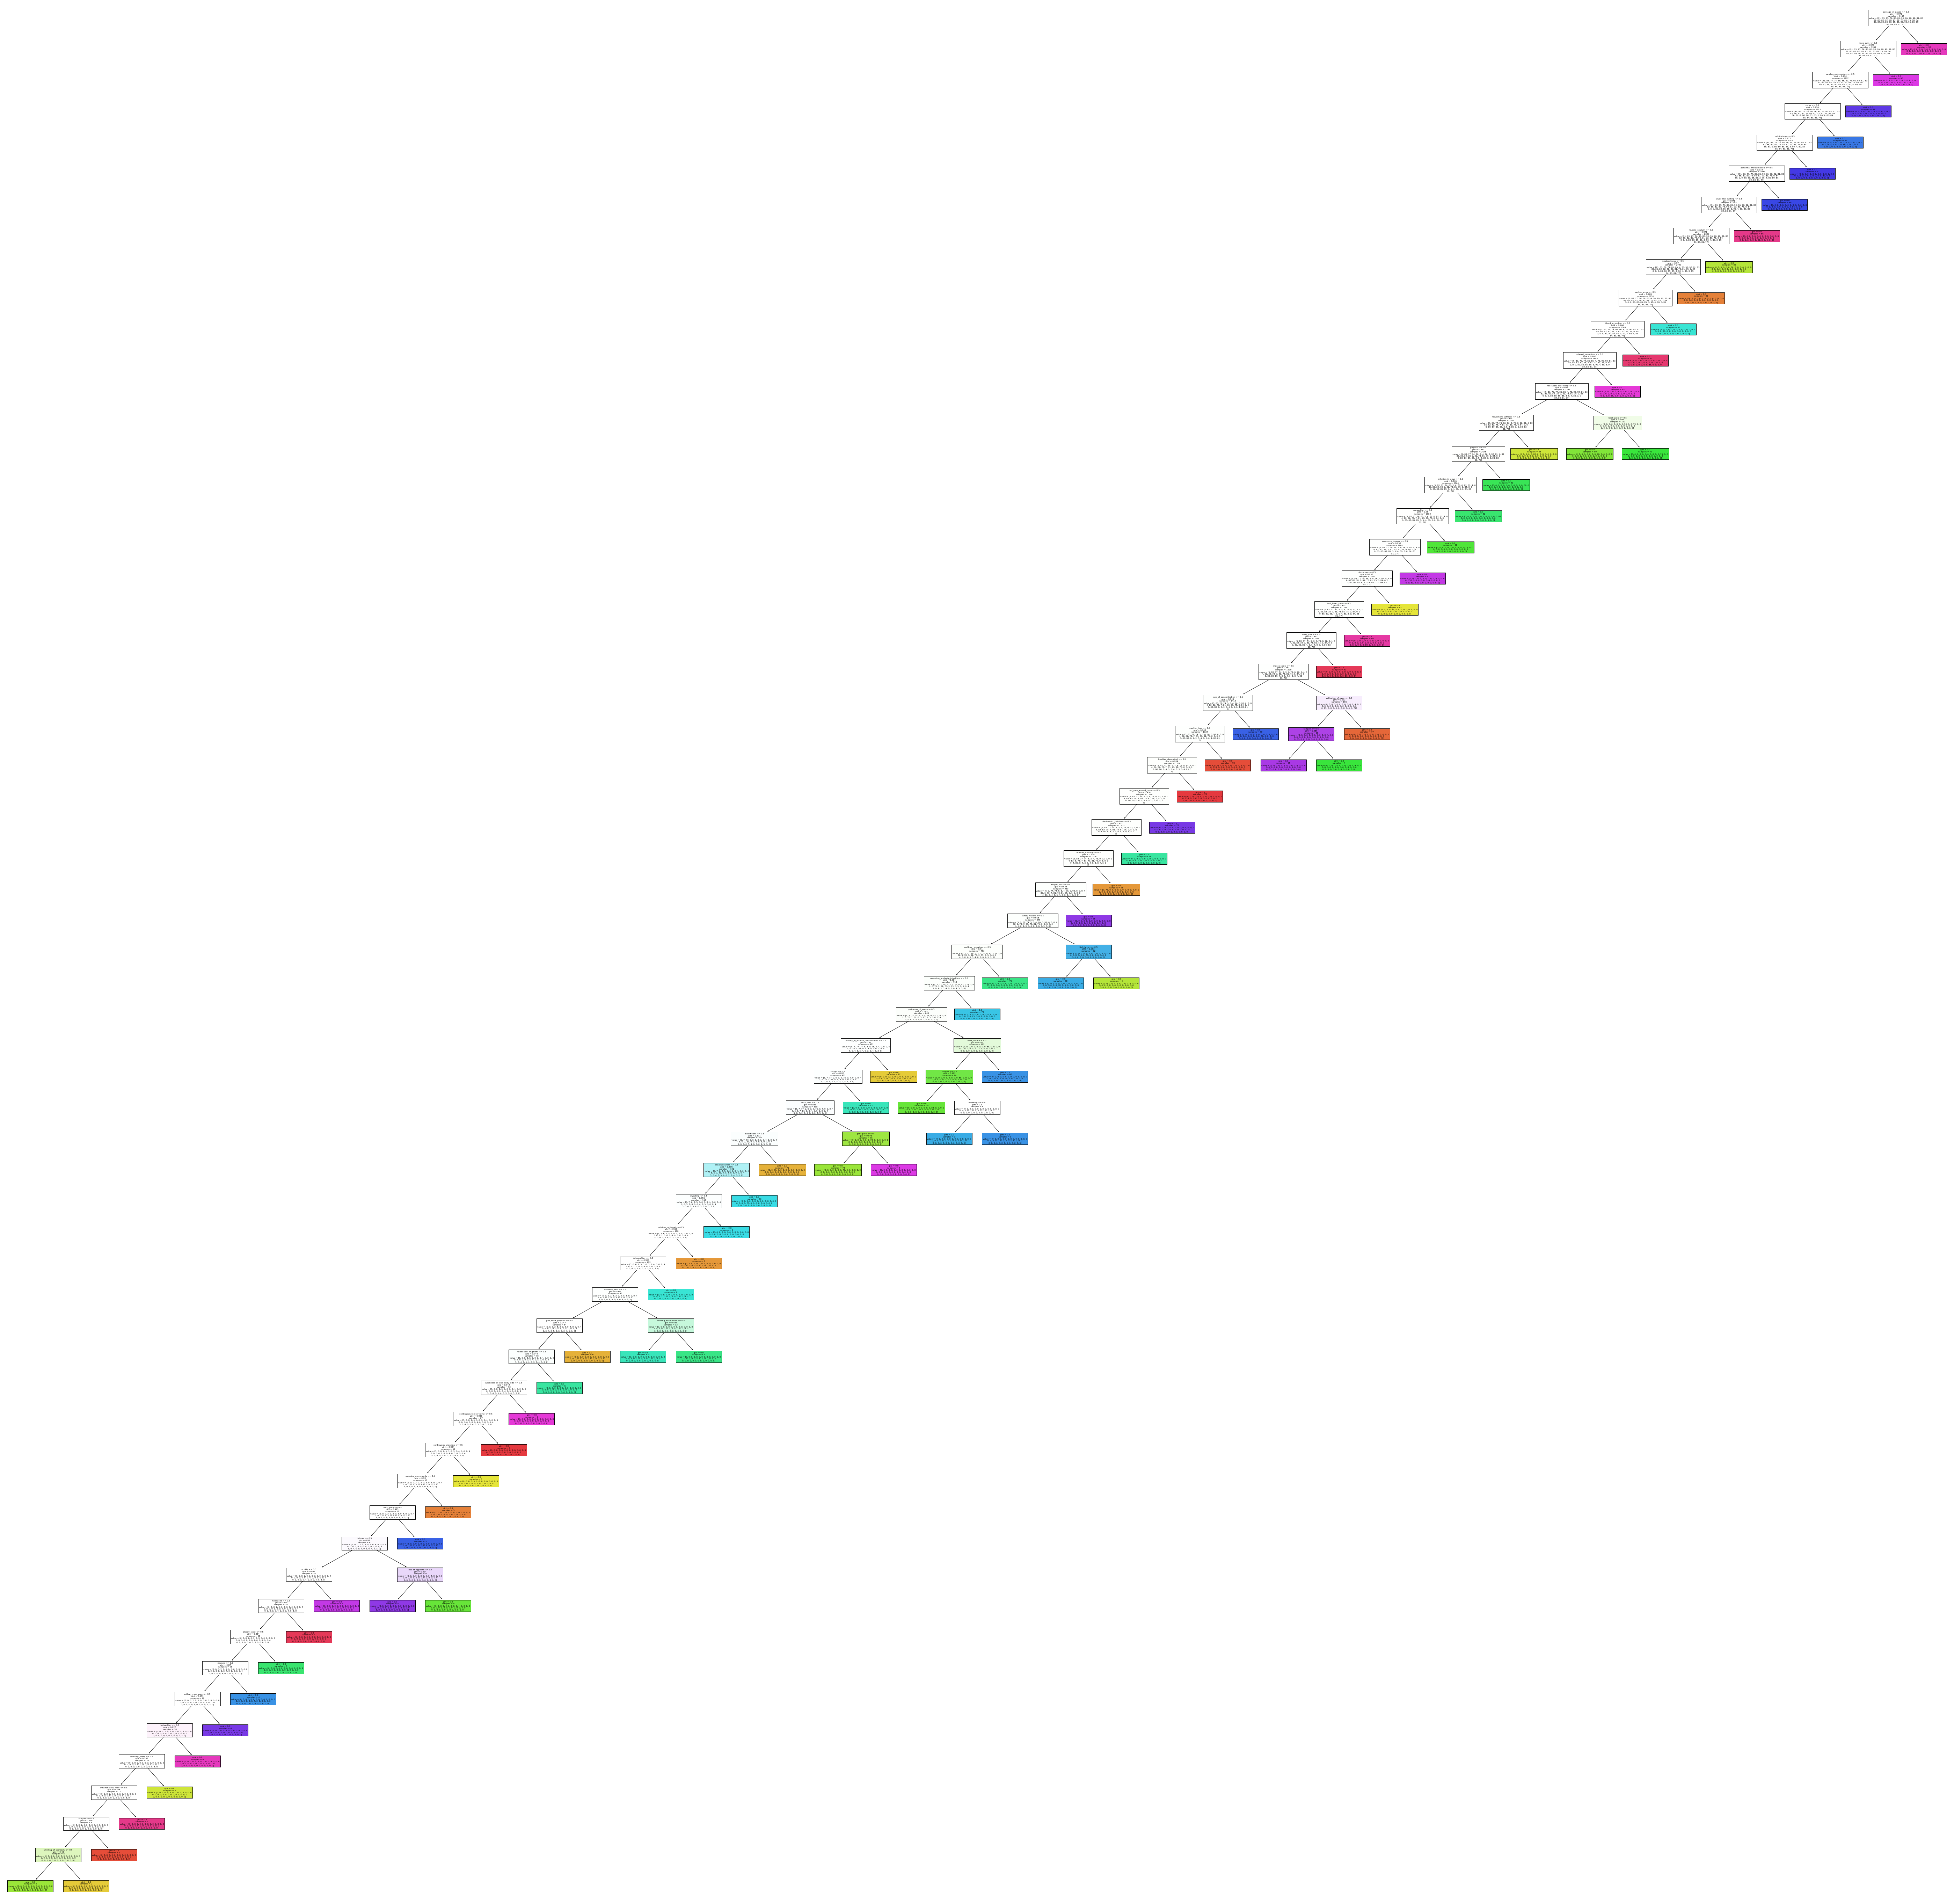

In [40]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(100,100))
# _ underscore it is a variable

_ = tree.plot_tree(
     dtmodel,
    feature_names=df.columns,
    filled =True
)

##### Manually prediction of decision tree model

In [41]:
# prediction for first row in dataset
dtmodel.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]])

array(['Fungal infection'], dtype=object)

In [42]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
